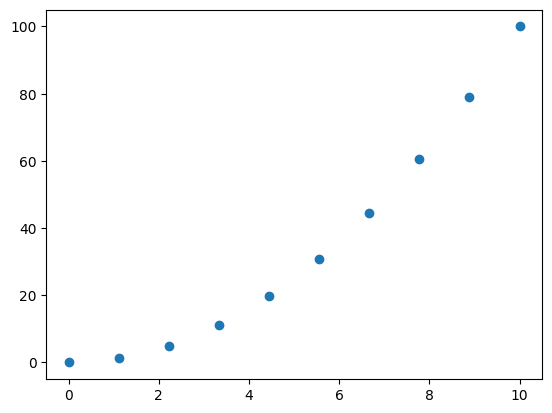

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d
x=np.linspace(0,10,10)
y=x**2
plt.scatter(x,y)

Pour faire une interpolation linéaire lorsqu'il manque des valeurs dans notre dataset par exemple 

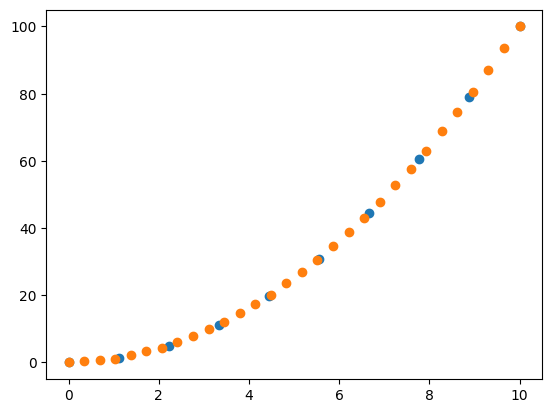

In [4]:
f=interp1d(x,y,kind='linear')
x_new=np.linspace(0,10,30)
result=f(x_new)
plt.scatter(x,y)
plt.scatter(x_new,result)

Optimisation à l'aide de curve_fit

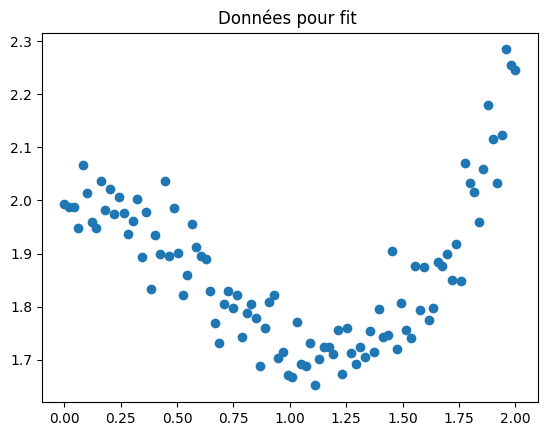

In [6]:
x=np.linspace(0,2,100)
y=1/3*x**3-3/5*x**2+2+np.random.randn(x.shape[0])/20
plt.title("Données pour fit ")
plt.scatter(x,y)

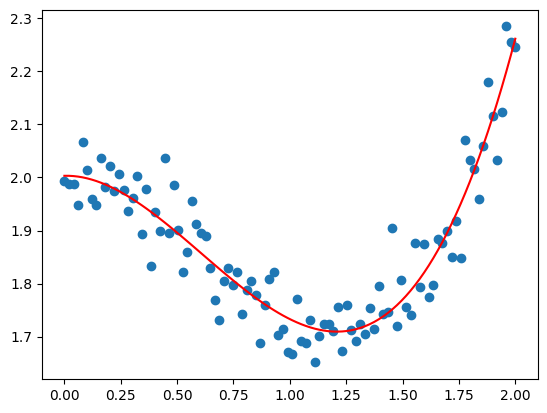

In [ ]:
def f(x,a,b,c,d):
    return(a*x**3+b*x**2+c*x+d)

from scipy import optimize
param,cov=optimize.curve_fit(f,x,y)
plt.scatter(x,y)
plt.plot(x,f(x,param[0],param[1],param[2],param[3]),c='red')


Minimisation

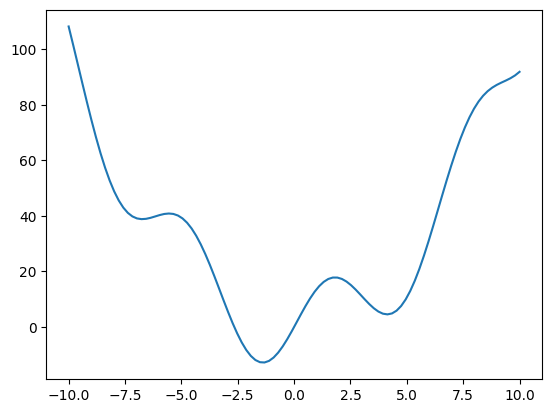

In [22]:
def f(x):
    return(x**2+15*np.sin(x))
x=np.linspace(-10,10,100)
plt.plot(x,f(x))

In [27]:
result=optimize.minimize(f,x0=-5).x #trouver le minimum de la fonction, .x pour accéder à la valeur 
result

array([-1.38505583])

Traitement du signal

100


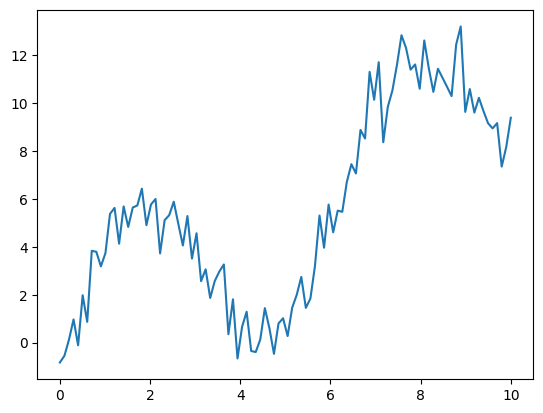

In [30]:
x=np.linspace(0,10,100)
y=x+4*np.sin(x)+np.random.randn(x.shape[0])
print(x.shape[0])
plt.plot(x,y)

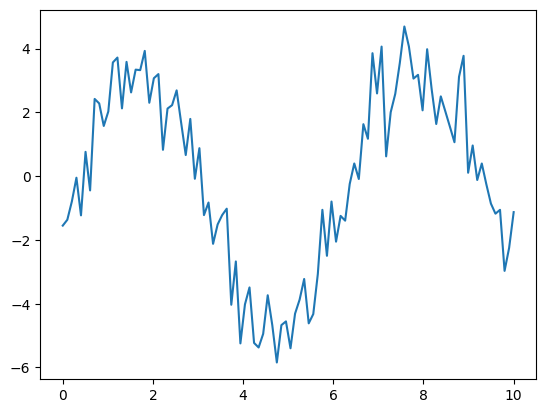

In [31]:
from scipy import signal 
new_y=signal.detrend(y)
plt.plot(x,new_y)

Transformation de Fourrier 

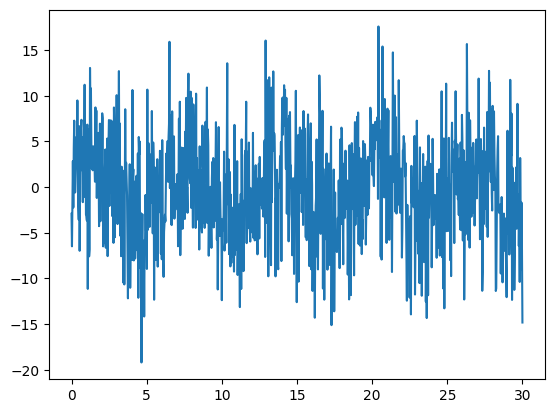

In [44]:
x=np.linspace(0,30,1000)
y=3*np.sin(x)+2*np.sin(5*x)+np.sin(10*x)+np.random.randn(x.shape[0])*5
plt.plot(x,y)

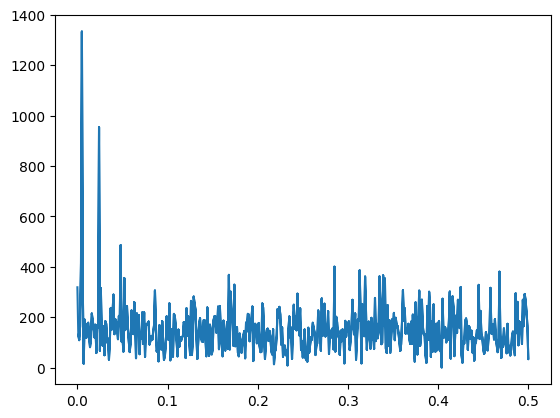

In [45]:
from scipy import fftpack
fourier=fftpack.fft(y)
power=np.abs(fourier) #pour éviter les négatifs
frequences=fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences),power)

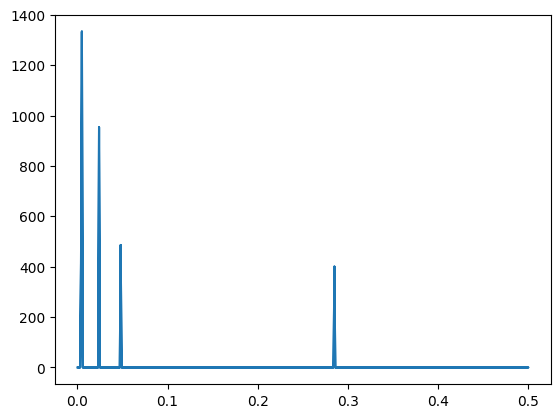

In [ ]:
fourier[power<400]=0 #élimination du bruit 
plt.plot(np.abs(frequences),np.abs(fourier))

C:\Users\qevan\AppData\Local\Temp\ipykernel_8368\3768072843.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


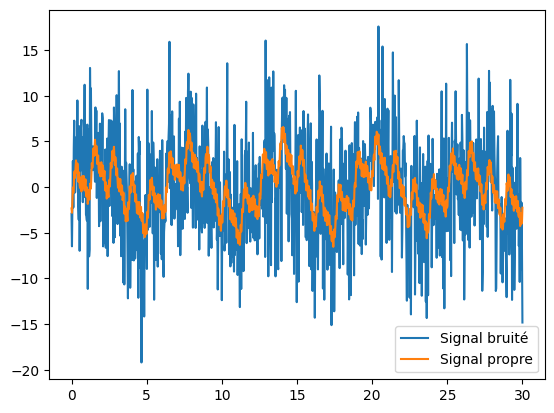

In [50]:
filtered=fftpack.ifft(fourier)
plt.legend()
plt.plot(x,y,label='Signal bruité')
plt.plot(x,filtered, label='Signal propre')
plt.legend()

Traitement d'image 

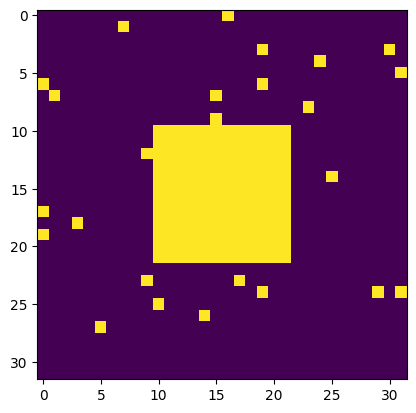

In [60]:
from scipy import ndimage
np.random.seed(0)
X=np.zeros((32,32))
X[10:-10,10:-10]=1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)]=1
plt.imshow(X)

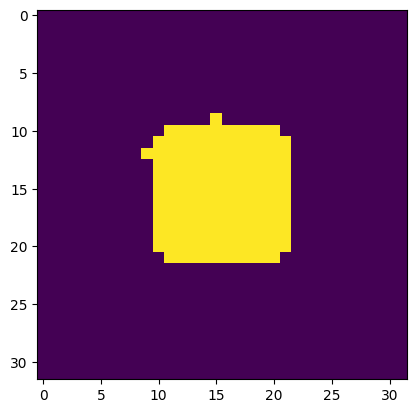

In [62]:
open_x=ndimage.binary_opening(X)
plt.imshow(open_x)

Décompte d'image 

(799, 1066)

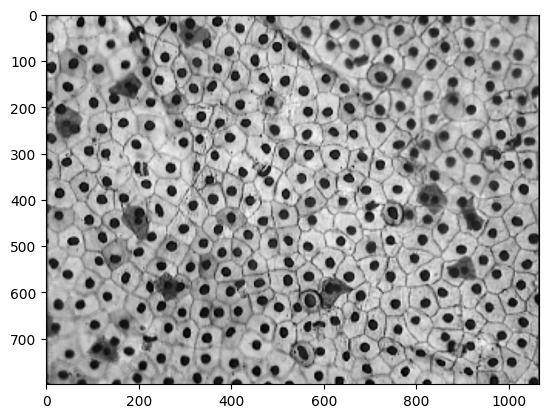

In [94]:
image=plt.imread('cellules.jpg')
image=image[:,:,0]
plt.imshow(image,cmap='gray')
image.shape

(array([2.7110e+03, 1.4210e+03, 1.5820e+03, 1.4020e+03, 1.2370e+03,
        1.2330e+03, 1.0900e+03, 9.7600e+02, 9.1100e+02, 1.0200e+03,
        9.2400e+02, 9.9300e+02, 1.0180e+03, 1.1580e+03, 1.2030e+03,
        1.1780e+03, 1.4250e+03, 1.4880e+03, 1.5320e+03, 1.6910e+03,
        1.9500e+03, 1.8700e+03, 2.0440e+03, 2.0280e+03, 2.2190e+03,
        2.2020e+03, 2.2020e+03, 2.3190e+03, 2.4350e+03, 2.4540e+03,
        2.5870e+03, 2.6890e+03, 2.7090e+03, 2.7180e+03, 2.8380e+03,
        2.8210e+03, 2.7490e+03, 2.7490e+03, 2.6740e+03, 2.5860e+03,
        2.5000e+03, 2.4100e+03, 2.1960e+03, 2.1220e+03, 1.9610e+03,
        1.7910e+03, 1.7250e+03, 1.6640e+03, 1.5090e+03, 1.3810e+03,
        1.4180e+03, 1.2710e+03, 1.2110e+03, 1.2700e+03, 1.2630e+03,
        1.1950e+03, 1.2350e+03, 1.1190e+03, 1.1980e+03, 1.0890e+03,
        1.1020e+03, 1.0680e+03, 1.0950e+03, 1.1290e+03, 1.1630e+03,
        1.1400e+03, 1.1180e+03, 1.1790e+03, 1.1860e+03, 1.2040e+03,
        1.2300e+03, 1.1920e+03, 1.1880e+03, 1.22

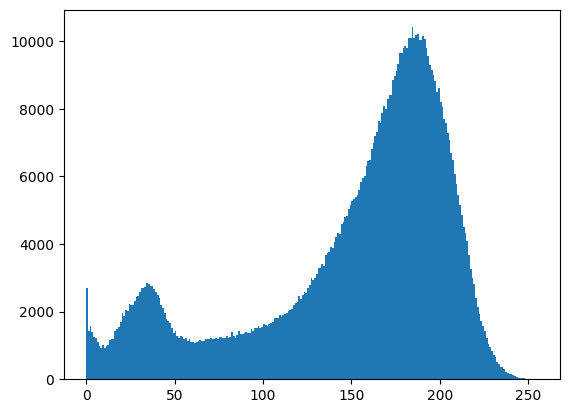

In [95]:
image_2=np.copy(image)
plt.hist(image_2.ravel(),bins=255)

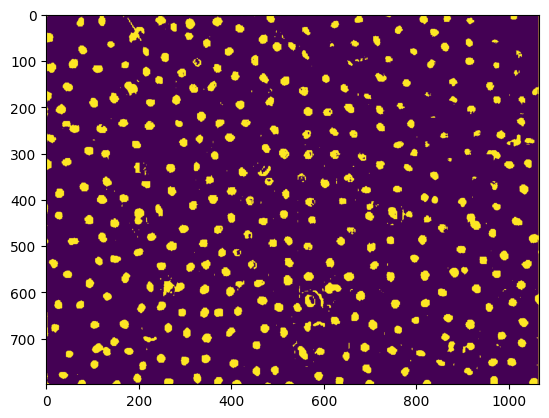

In [96]:
image_2=image_2<50
plt.imshow(image_2)

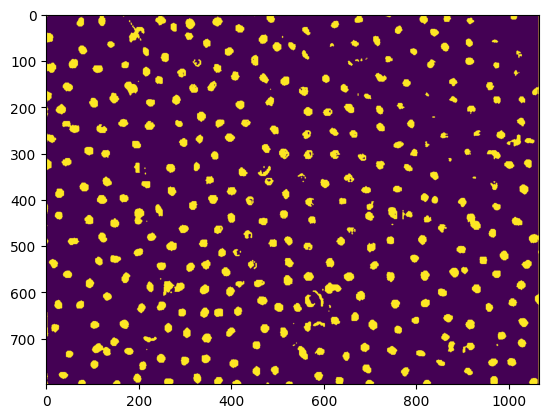

In [97]:
#nettoyage des artefacts 
open_x=ndimage.binary_opening(image_2)
plt.imshow(open_x)

363


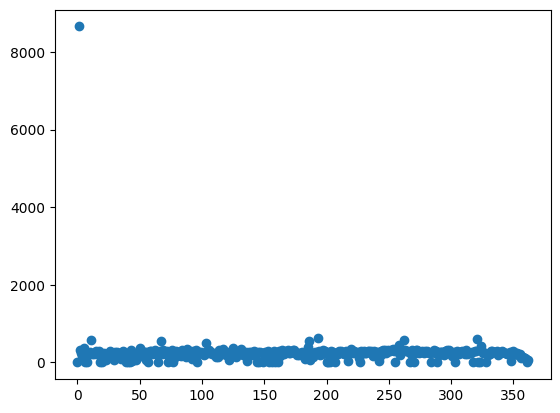

In [101]:
label_image,n_labels=ndimage.label(open_x)
print(n_labels)

#obtenir la taille 
sizes=ndimage.sum(open_x,label_image,range(n_labels))
plt.scatter(range(n_labels),sizes)